# Customer Churn Clasifier

- Data set: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

El dataset se conforma de información sobre el comportamiento de clientes de la compañía de telecomunicaciones "Telco", nos yudara a entrenar un modelo de regresión lógistica para clasificar o predecir si un cliente abandonará o no su subscripción. 


Información que podemos encontrar en el dataset:
- **Servicios contratados por cada cliente**: Teléfono, multiples lineas, internet, seguridad online, respaldo online, protección de dispositivos, soporte técnico y servicios de streaming de TV y películas.
- **Información de clientes**: Perdiodo de tiempo que han sido clientes, contrato, método de pago, cobro domiciliado, cargos mensuales y cargos totales.
- **Información demográfica**: Genero, rango de edad y si tiene dependents.

## Líbrerias

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Posterior a la versión 22 no es posible importar janitor, por un error en una de las librerias que utiliza pyjanitor
%pip install pyjanitor==0.22.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Manejo de rutas
import sys
sys.path.append("..")
import modules.utils.paths as path

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Escalamiento del modelo
from sklearn.preprocessing import MinMaxScaler

# Limpieza de datos
import janitor

## Carga de datos

In [4]:
file_path = path.data_raw_dir("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = pd.read_csv(file_path)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

## Limpieza

### Depuración de variables

In [7]:
# Cambio de nombre de las variables 
df = df.clean_names(case_type="snake")
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Eliminamos columnas customer_id que es irrelevante para el entrenamiento
df.drop(columns="customer_id", axis=1, inplace=True)

In [9]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Cambio de tipos de datos

Cambio de Total Charges de tipo `object` a tipo `float64`.

In [10]:
df["total_charges"] = pd.to_numeric(df["total_charges"], errors="coerce")

Cambio de la variable objetivo `churn` de `object` a `int` con valores de 0 y 1.

In [11]:
df["churn"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df["churn"].replace(to_replace={"Yes": 1, "No": 0 }, inplace=True)
df["churn"].dtype

dtype('int64')

### Manejo de valores nulos

In [13]:
df.isnull().sum() 

gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

El dataset solo cuenta con 11 valores nulos en la variable `total_charges`, eliminarlos no generará una gran afectación a la hora de entrenar el modelo.

In [14]:
# Eliminarlos los valores nulos
df.dropna(inplace=True)

## Manejo de variables categóricas

In [15]:
processed_df = pd.get_dummies(df)
processed_df

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


## EDA

### Análisis de variables categóricas

In [16]:
categorical_cols = df.select_dtypes(include="object").columns
len(categorical_cols)

15

In [17]:
def plot_categoricals(cols):
  fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(16,4))
  axes = axes.flatten()

  for col, ax in zip(cols, axes):
    sns.countplot(
      data=df,
      x=col,
      hue="churn",
      ax=ax
    )
    ax.tick_params(axis='x', rotation=45)
  plt.tight_layout();

1. Análisis por `gender`, `parner` y `dependents` respecto a `churn`.

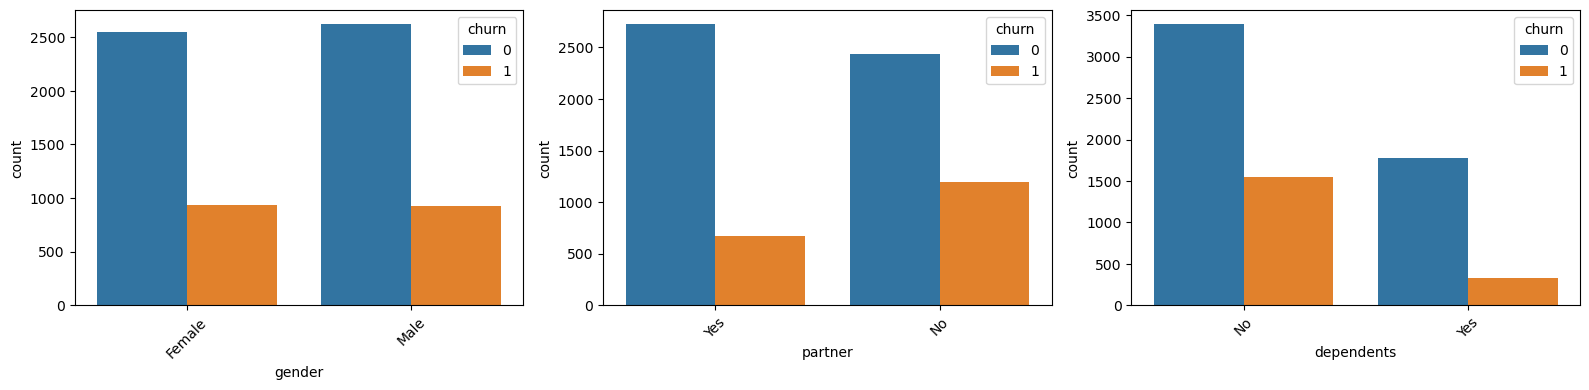

In [18]:
plot_categoricals(categorical_cols[:3])

**Observaciones**
- El genero (`genre`) del cliente no influye en si mantienen o abandonan la subscripción (`churn`).
- Lo clientes que no tienen pareja (`partner`) son más propensos a abandonar la subscripción.
- Clientes que no tienen dependientes (`dependents`, pueden ser hijos ó padres, etc.) dimiten de la subscripción mayormente que los que si tienen dependientes.

2. Análisis por `phone service`, `multiple lines` y `internet services`.

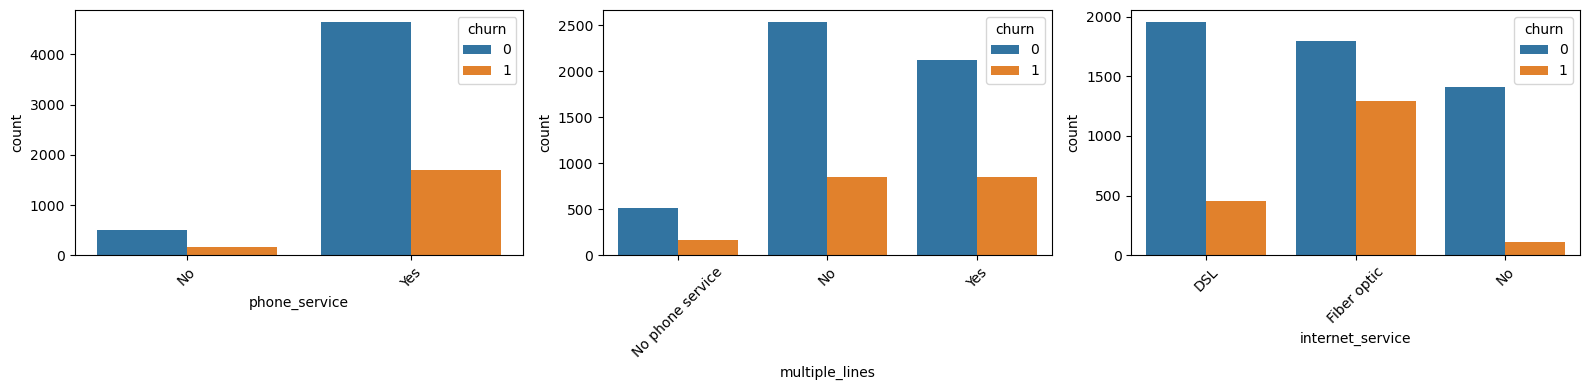

In [19]:
plot_categoricals(categorical_cols[3:6])

In [20]:
print("Proporción de clientes que hace churn según laa variables 'phone_service' y 'multiple_lines'")
phone_service = df.groupby(["phone_service", "churn"]).size().reset_index(name="total")
phone_service["churn_ratio"] = phone_service.groupby("phone_service")["total"].transform(lambda x: x / x.sum())

print(phone_service)

multiple_lines = df.groupby(["multiple_lines", "churn"]).size().reset_index(name="total")
multiple_lines["churn_ratio"] = multiple_lines.groupby("multiple_lines")["total"].transform(lambda x: x / x.sum())
print(multiple_lines)


Proporción de clientes que hace churn según laa variables 'phone_service' y 'multiple_lines'
  phone_service  churn  total  churn_ratio
0            No      0    510     0.750000
1            No      1    170     0.250000
2           Yes      0   4653     0.732525
3           Yes      1   1699     0.267475
     multiple_lines  churn  total  churn_ratio
0                No      0   2536     0.749188
1                No      1    849     0.250812
2  No phone service      0    510     0.750000
3  No phone service      1    170     0.250000
4               Yes      0   2117     0.713515
5               Yes      1    850     0.286485


**Observaciones**:
- Hay más clientes que si tienen servicio teléfonico, por ende estos clientes cuentan con mas abandono de subscrión, sin embargo las proporciones de datos entre el número de clientes con servicio teléfonico y los que no, es casi la misma, donde el 75% de los clientes permanece con la suscripcion, mientras que el 25% la abandona.
- Lo mismo ocurre con clientes que cuentan con multiples líneas, en las tres categórias los clientes continual con el servicio (no hace churn).
- Clientes que no cuenta con servicio de internet abandonan en menor medida a la compañia que aquellos que cuenten con sercicio de internet con fibra óptica y DSL.

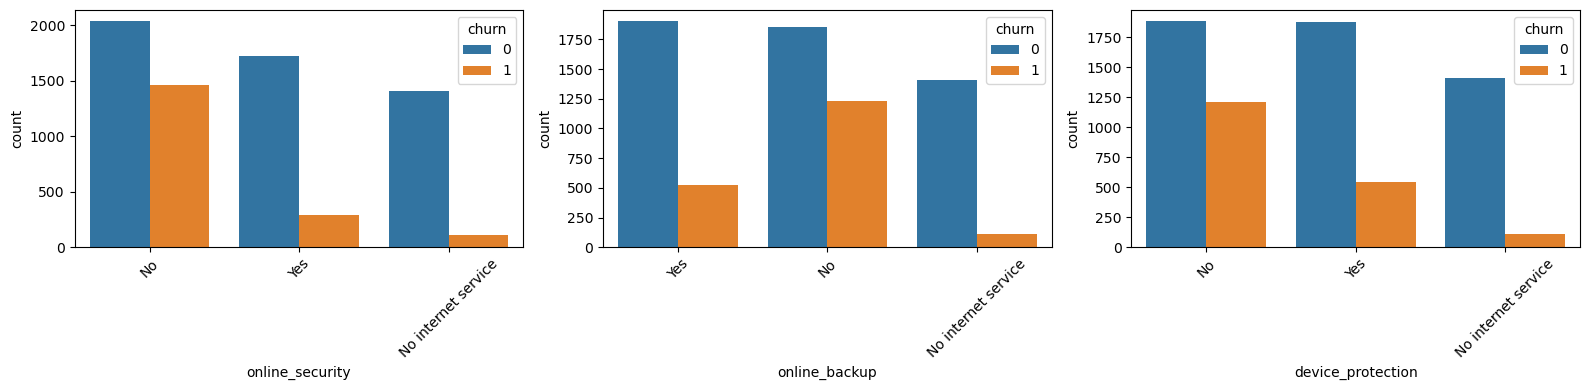

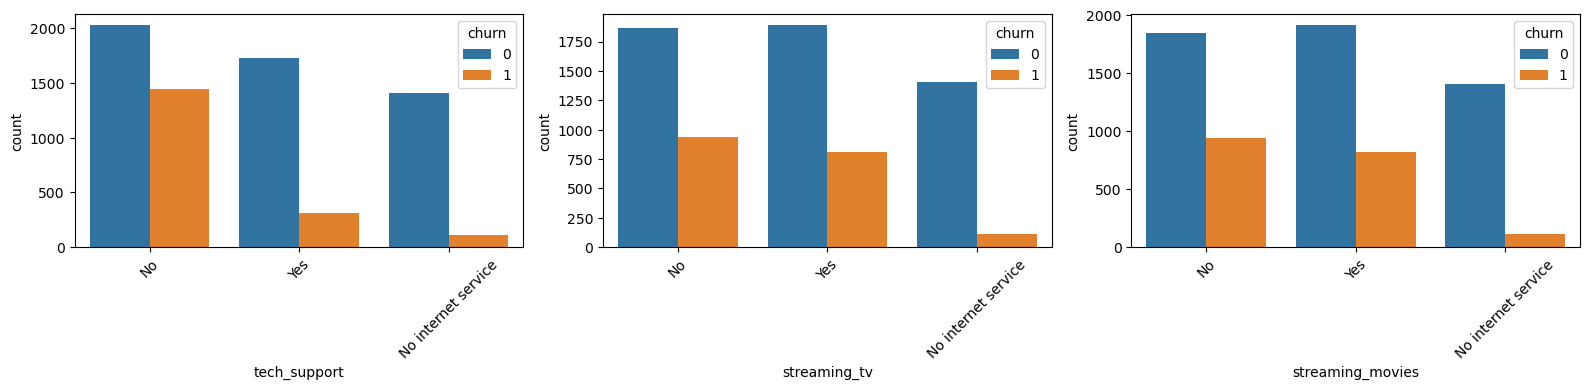

In [21]:
plot_categoricals(categorical_cols[6:9])
plot_categoricals(categorical_cols[9:12])

**Observaciones:**
- Clientes sin servico de internet contratado son más propensos a permanecer en la compañia.

¿El costo de la subscrión es demasiado elevado cuando se contrata el servicio de internet?

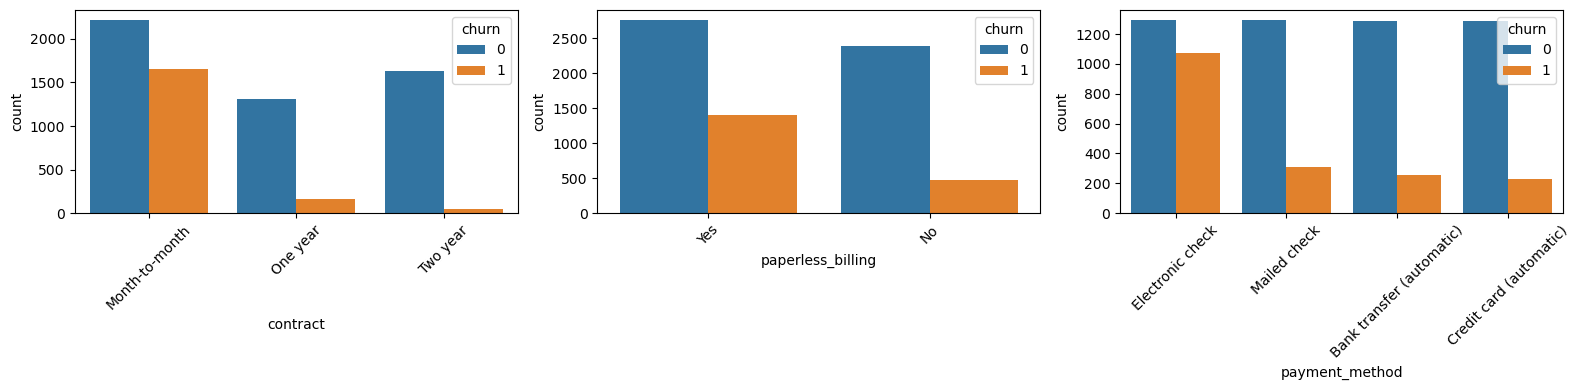

In [22]:
plot_categoricals(categorical_cols[12:])

**Observaciones**:
- Los clientes más fieles son aquellos con contratros de periodos largos.
- Clientes con cargos domiciliados tienen mayor indice de churn.

## Análisis de variables numéricas

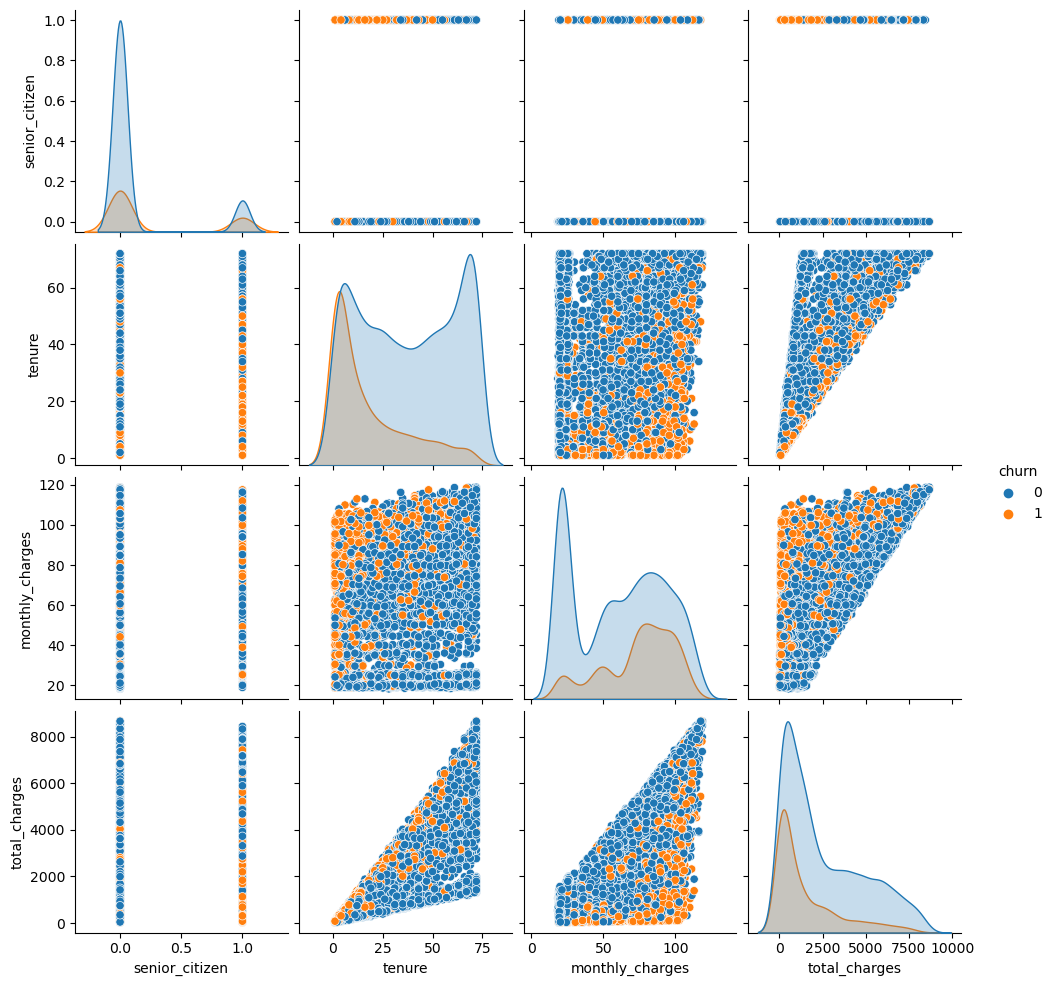

In [23]:
sns.pairplot(
  data=df,
  hue="churn"
);

**Observaciones**:
- Clientes con altos pagos mesuales son a su son más propensos a presindir de la subscripción, por ende tienen menos duración en la compañia y generan menos cargos totales.

### Análisis de correlación

El anális de correlación lo realizaremos con el dataframe de los datos procesados, de esta forma podremos calcular la correlación de todas las variables respecto a `churn`.

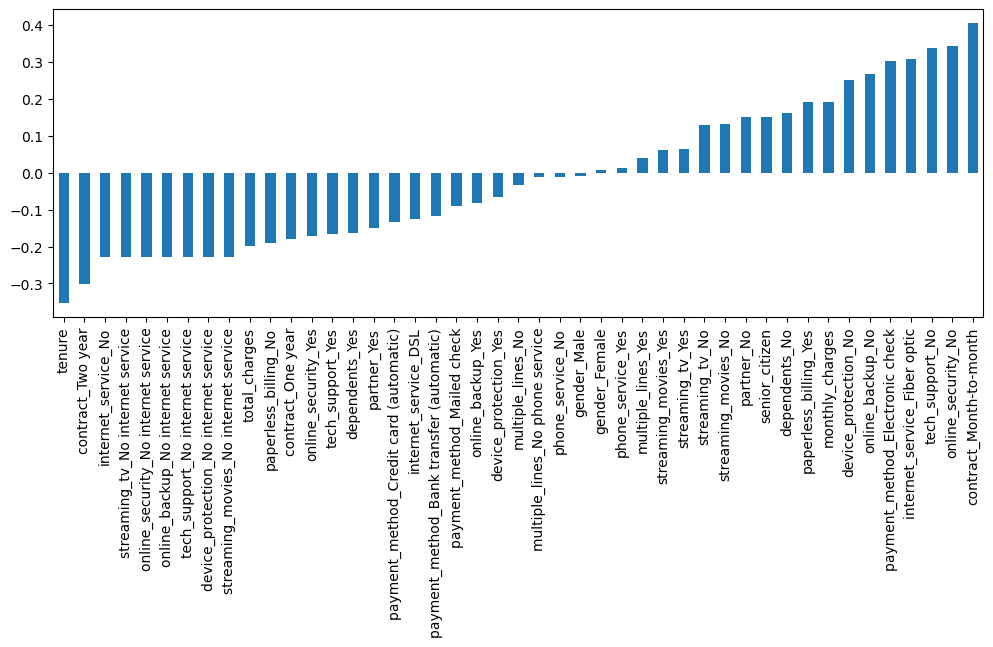

In [24]:
plt.figure(figsize=(12,4))
processed_df.corr()["churn"].sort_values(ascending=True)[:-1].plot(kind="bar");

**Observaciones**:
- Clientes con contratos mensuales, sin servicio de seguridad online ni soporte técnico estan altamente correlacionadas con el abandono de la compañia.
- En caso contrario, los clientes con mayor tiempo en la compañia y con contratos extensos estan inversamente correlacionados al churn, lo que significa que son clientes que tienden a quedarse con su subscripciones.
- Por otro lado, contar o no con servicio telefononico o el genero, no influyen en el cliente al a hora de decidir si abanandonar la compañia o no.

## Escalamiento de datos

El objetivo de escalar los datos a un mismo rango de valores, es para que el algoritmo entienda mejor los datos y no le de mayor prioridad a datos con valores muy altos.

Para este ejercicio se utiliza el escalamiento `min-max`.

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(processed_df)

scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = processed_df.columns

scaled_data.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
